In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread, imread_collection, imshow, imshow_collection
from scipy.signal import convolve2d

# Working with Images

Една голяма част от данните, които получаваме в нашето съвремие са неструктурирани.
Структурирани данни са тези, които имат модел или тези, които можем да организираме в таблица с редове и колони, таблица която можем да подредим по правилата за нормализация.

Сравнително често се получава така, че данните ни са някаква смесица, така нареченият хетерогенен, с различни произходи, дейта сет.

Начинът по който получаваме данните, видът в който се намират те, се нарича модалност(modality).
И двете най-популярни модалности са изображение и текст. Може да даддем видеото като нещо отделно. Но видеото може да си представим, че е последователност от изображения. 
Може да гледаме аудиото отделно. Аудиото има доста голяма връзка, доста голямо подобие с текста.
И двете по някакъв начин представляват функции на времето. Тъй като текста представлява последователни думи, а аудиото представлява последователни семпли.

**Начина за работа и с изображение и с текст има най-често 2 аспекта:**
1. Единият е свързан с по-класическото машинно обучение.
2. Другия от тях с дълбокото машинно обучение.

Оказва се, че двата начина са малко различни.

**Основните идеи свързани с причината да говорим за работа с изображения и с текст имат 2 основни типа характеристики:**
1. Едната е да изкараме някаква статистическа информация, някакви характеристики на самото изображение и т.н., които може да са ни полезни.
2. Другата насока е да получим представа за съдържанието.

Сега нека да прочетем едно изображение:

In [2]:
imread("cat_taxonomy/domestic-cat/dc (17).jpg")

array([[[ 64,  88,  90],
        [ 59,  83,  85],
        [ 51,  75,  77],
        ...,
        [ 39,  41,  28],
        [ 39,  41,  27],
        [ 39,  41,  27]],

       [[ 58,  82,  84],
        [ 55,  79,  81],
        [ 49,  73,  75],
        ...,
        [ 39,  41,  28],
        [ 39,  41,  27],
        [ 39,  41,  27]],

       [[ 50,  74,  76],
        [ 49,  73,  75],
        [ 46,  70,  72],
        ...,
        [ 37,  39,  26],
        [ 37,  39,  25],
        [ 37,  39,  25]],

       ...,

       [[118, 169,  64],
        [117, 168,  63],
        [124, 172,  72],
        ...,
        [162, 202,  87],
        [177, 216,  99],
        [190, 227, 111]],

       [[131, 182,  77],
        [125, 176,  71],
        [125, 173,  73],
        ...,
        [169, 208,  93],
        [184, 221, 105],
        [199, 234, 118]],

       [[139, 190,  85],
        [132, 183,  78],
        [129, 177,  77],
        ...,
        [174, 211,  97],
        [190, 225, 109],
        [203, 236, 121]]

И получаваме един тримерен масив.

In [3]:
cat_image = imread("cat_taxonomy/domestic-cat/dc (17).jpg")

Ето какви са му размерите:

In [4]:
cat_image.shape

(183, 275, 3)

Първото имерение, в случая 183, е по редовете (height). Второто е по колоните.

И затова първо е височината, после е широчината и 3 са каналите. Понеже имаме стандартен jpg каналите са червен, зелен и син.

Ако вземем всичките стойности пространствено и нулевия канал за всяка една от тях това ще бъде червената част от изображението:

In [5]:
cat_image[:, :, 0]

array([[ 64,  59,  51, ...,  39,  39,  39],
       [ 58,  55,  49, ...,  39,  39,  39],
       [ 50,  49,  46, ...,  37,  37,  37],
       ...,
       [118, 117, 124, ..., 162, 177, 190],
       [131, 125, 125, ..., 169, 184, 199],
       [139, 132, 129, ..., 174, 190, 203]], dtype=uint8)

Отдолу имаме високи стойности на червеното, което има обяснение, защото там е по-светло.
Светлите пиксели ще имат високи стойности навсякъде.

In [6]:
imread_collection("cat_taxonomy/domestic-cat/*")[0]

array([[[185, 188, 193],
        [183, 186, 191],
        [179, 182, 187],
        ...,
        [107, 161,  83],
        [104, 163,  83],
        [104, 163,  83]],

       [[186, 189, 194],
        [184, 187, 192],
        [181, 184, 189],
        ...,
        [103, 157,  79],
        [100, 159,  79],
        [100, 159,  79]],

       [[189, 192, 197],
        [187, 190, 195],
        [184, 187, 192],
        ...,
        [ 98, 152,  74],
        [ 96, 153,  74],
        [ 96, 153,  74]],

       ...,

       [[ 55, 145,  55],
        [ 75, 164,  72],
        [ 73, 156,  66],
        ...,
        [101, 175,  96],
        [ 98, 177,  98],
        [ 98, 176, 100]],

       [[ 68, 158,  68],
        [ 85, 174,  82],
        [ 80, 163,  73],
        ...,
        [ 87, 171,  86],
        [ 83, 171,  87],
        [ 83, 170,  89]],

       [[ 78, 168,  78],
        [ 93, 182,  90],
        [ 85, 168,  78],
        ...,
        [ 85, 173,  86],
        [ 80, 174,  86],
        [ 80, 174,  88]]

In [7]:
all_domestic_cats_collection = imread_collection("cat_taxonomy/domestic-cat/*")

Тук можем да използваме върху него next() или list():

In [8]:
domestic_cats = list(all_domestic_cats_collection)

In [9]:
len(domestic_cats)

64

Имаме общо 64 изображения.

Мога да взема първото от тях:

In [10]:
domestic_cats[0]

array([[[185, 188, 193],
        [183, 186, 191],
        [179, 182, 187],
        ...,
        [107, 161,  83],
        [104, 163,  83],
        [104, 163,  83]],

       [[186, 189, 194],
        [184, 187, 192],
        [181, 184, 189],
        ...,
        [103, 157,  79],
        [100, 159,  79],
        [100, 159,  79]],

       [[189, 192, 197],
        [187, 190, 195],
        [184, 187, 192],
        ...,
        [ 98, 152,  74],
        [ 96, 153,  74],
        [ 96, 153,  74]],

       ...,

       [[ 55, 145,  55],
        [ 75, 164,  72],
        [ 73, 156,  66],
        ...,
        [101, 175,  96],
        [ 98, 177,  98],
        [ 98, 176, 100]],

       [[ 68, 158,  68],
        [ 85, 174,  82],
        [ 80, 163,  73],
        ...,
        [ 87, 171,  86],
        [ 83, 171,  87],
        [ 83, 170,  89]],

       [[ 78, 168,  78],
        [ 93, 182,  90],
        [ 85, 168,  78],
        ...,
        [ 85, 173,  86],
        [ 80, 174,  86],
        [ 80, 174,  88]]

Или например 16-тото:

In [11]:
domestic_cats[16]

array([[[ 64,  88,  90],
        [ 59,  83,  85],
        [ 51,  75,  77],
        ...,
        [ 39,  41,  28],
        [ 39,  41,  27],
        [ 39,  41,  27]],

       [[ 58,  82,  84],
        [ 55,  79,  81],
        [ 49,  73,  75],
        ...,
        [ 39,  41,  28],
        [ 39,  41,  27],
        [ 39,  41,  27]],

       [[ 50,  74,  76],
        [ 49,  73,  75],
        [ 46,  70,  72],
        ...,
        [ 37,  39,  26],
        [ 37,  39,  25],
        [ 37,  39,  25]],

       ...,

       [[118, 169,  64],
        [117, 168,  63],
        [124, 172,  72],
        ...,
        [162, 202,  87],
        [177, 216,  99],
        [190, 227, 111]],

       [[131, 182,  77],
        [125, 176,  71],
        [125, 173,  73],
        ...,
        [169, 208,  93],
        [184, 221, 105],
        [199, 234, 118]],

       [[139, 190,  85],
        [132, 183,  78],
        [129, 177,  77],
        ...,
        [174, 211,  97],
        [190, 225, 109],
        [203, 236, 121]]

Също можем да видим дали това е изображението, което сме поискали:

In [12]:
(domestic_cats[16] == cat_image).all()

True

Така се четат изображения.

Както можем да използваме:

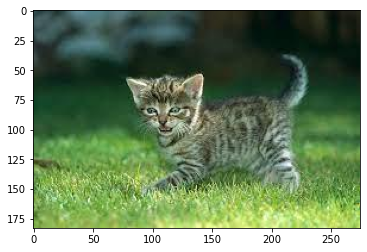

In [13]:
plt.imshow(cat_image)

Така можем да използваме и imshow от skimage.io:

In [14]:
imshow

<function skimage.io._io.imshow(arr, plugin=None, **plugin_args)>

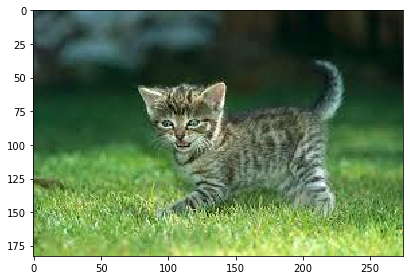

In [15]:
imshow(cat_image)

В четенето на двете разлика няма, освен че втората картинка е малко по-голяма.

Ако поискаме червения канал го получаваме по този начин:

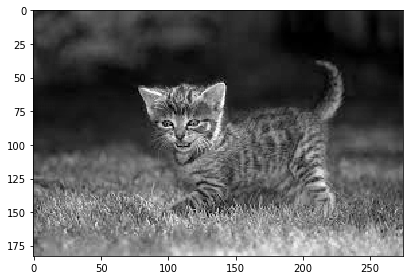

In [16]:
imshow(cat_image[:, :, 0])

Обаче ако извикаме на plt.imshow същото нещо дефолтният color маркер няма да бъде същия:

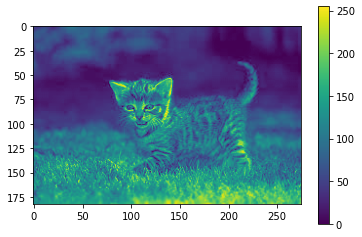

In [17]:
plt.imshow(cat_image[:, :, 0])
plt.colorbar()

Можем да му кажем и какъв color map да използва:

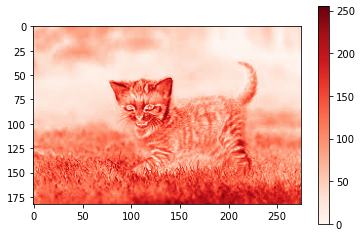

In [18]:
plt.imshow(cat_image[:, :, 0], cmap = "Reds")
plt.colorbar()

В skimage ако е двумерно изображение очаква да е черно-бяло, а в matplotlib да е хистограма.

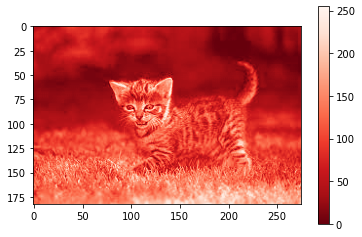

In [19]:
plt.imshow(cat_image[:, :, 0], cmap = "Reds_r")  # reds reversed
plt.colorbar()
plt.show()

Това е един показател колко червено има всеки един пиксел. Колкото по-тъмен е цвета, толкова по-малка е стойността. Това разбира се можем да го направим и с другите канали.

Тук също можем да направим слайсинг:

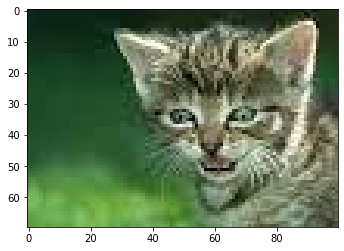

In [20]:
plt.imshow(cat_image[50:120, 50:150])

Или да пропуснем всеки втори ред и всяка втора колона:

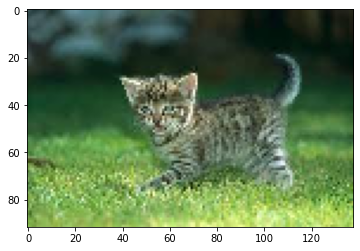

In [21]:
plt.imshow(cat_image[::2, ::2])

Типа данни е uint8. Означава integer, 8 битов, 0 - 256, който няма знак. И това е доста важно, има доста голямо значение когато правим някакъв вид трансформации върг=ху изображението. Много често тези трансфорации са свързани с необходимостта изобржението, всеки пиксел от него да получи стойност, която е floating point, която има десетична част, дробна част.

In [22]:
cat_image.dtype

dtype('uint8')

Тук преобразуваме пикселите на float type:

In [23]:
cat_image.astype(float)

array([[[ 64.,  88.,  90.],
        [ 59.,  83.,  85.],
        [ 51.,  75.,  77.],
        ...,
        [ 39.,  41.,  28.],
        [ 39.,  41.,  27.],
        [ 39.,  41.,  27.]],

       [[ 58.,  82.,  84.],
        [ 55.,  79.,  81.],
        [ 49.,  73.,  75.],
        ...,
        [ 39.,  41.,  28.],
        [ 39.,  41.,  27.],
        [ 39.,  41.,  27.]],

       [[ 50.,  74.,  76.],
        [ 49.,  73.,  75.],
        [ 46.,  70.,  72.],
        ...,
        [ 37.,  39.,  26.],
        [ 37.,  39.,  25.],
        [ 37.,  39.,  25.]],

       ...,

       [[118., 169.,  64.],
        [117., 168.,  63.],
        [124., 172.,  72.],
        ...,
        [162., 202.,  87.],
        [177., 216.,  99.],
        [190., 227., 111.]],

       [[131., 182.,  77.],
        [125., 176.,  71.],
        [125., 173.,  73.],
        ...,
        [169., 208.,  93.],
        [184., 221., 105.],
        [199., 234., 118.]],

       [[139., 190.,  85.],
        [132., 183.,  78.],
        [129., 1

In [24]:
cat_image.astype(float).dtype

dtype('float64')

Така заема 8 пъти повече място отколкото би заемало нормално, но ни позволява да правим някакви обработки.  Ако правим такива обработки и запишем изображението после можем да го конвертираме обратно към типа данни unit8.

cat_image е един numpy масив и към него можем да добавим 100, към всяко едно число в него:

In [25]:
cat_image + 100

array([[[164, 188, 190],
        [159, 183, 185],
        [151, 175, 177],
        ...,
        [139, 141, 128],
        [139, 141, 127],
        [139, 141, 127]],

       [[158, 182, 184],
        [155, 179, 181],
        [149, 173, 175],
        ...,
        [139, 141, 128],
        [139, 141, 127],
        [139, 141, 127]],

       [[150, 174, 176],
        [149, 173, 175],
        [146, 170, 172],
        ...,
        [137, 139, 126],
        [137, 139, 125],
        [137, 139, 125]],

       ...,

       [[218,  13, 164],
        [217,  12, 163],
        [224,  16, 172],
        ...,
        [  6,  46, 187],
        [ 21,  60, 199],
        [ 34,  71, 211]],

       [[231,  26, 177],
        [225,  20, 171],
        [225,  17, 173],
        ...,
        [ 13,  52, 193],
        [ 28,  65, 205],
        [ 43,  78, 218]],

       [[239,  34, 185],
        [232,  27, 178],
        [229,  21, 177],
        ...,
        [ 18,  55, 197],
        [ 34,  69, 209],
        [ 47,  80, 221]]

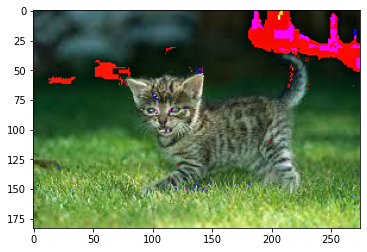

In [26]:
plt.imshow((cat_image + 500).astype("uint8"))

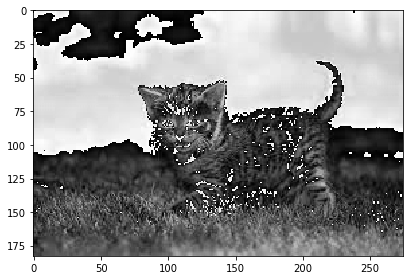

In [27]:
imshow((cat_image[:, :, 0] + 200).astype("uint8"))

Този ефект на преекспониране се нарича solarization.

C:\Users\galin\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


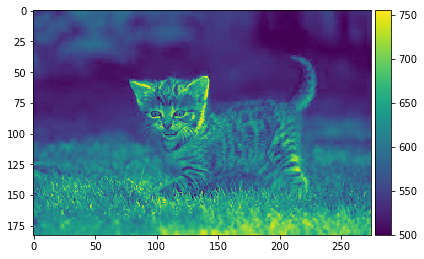

In [28]:
imshow((cat_image[:, :, 0] + 500))

С vimn и vmax параметрите казвам колко е минималната снойност на изображението и колко е максималната:

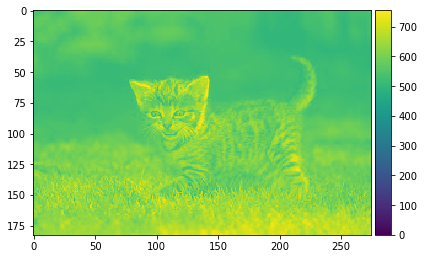

In [29]:
imshow((cat_image[:, :, 0] + 500), vmin = 0, vmax = 500 + 256)

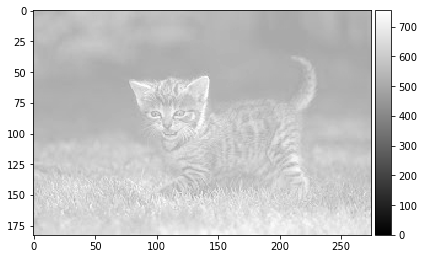

In [30]:
imshow((cat_image[:, :, 0] + 500), vmin = 0, vmax = 500 + 256, cmap = "gray")

Можем да имаме отрицателни стойности:

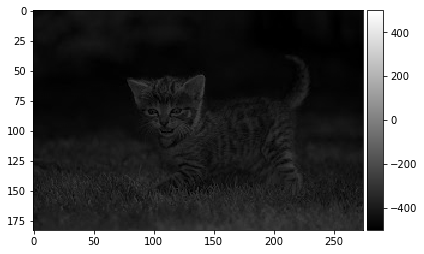

In [31]:
imshow((cat_image[:, :, 0].astype(int) - 500), cmap = "gray")

In [32]:
(cat_image[:, :, 0].astype(int) - 500)

array([[-436, -441, -449, ..., -461, -461, -461],
       [-442, -445, -451, ..., -461, -461, -461],
       [-450, -451, -454, ..., -463, -463, -463],
       ...,
       [-382, -383, -376, ..., -338, -323, -310],
       [-369, -375, -375, ..., -331, -316, -301],
       [-361, -368, -371, ..., -326, -310, -297]])

Можем да имаме floating point стойности, много често ги правим такива:

In [33]:
(cat_image[:, :, 0].astype(float) - 500)

array([[-436., -441., -449., ..., -461., -461., -461.],
       [-442., -445., -451., ..., -461., -461., -461.],
       [-450., -451., -454., ..., -463., -463., -463.],
       ...,
       [-382., -383., -376., ..., -338., -323., -310.],
       [-369., -375., -375., ..., -331., -316., -301.],
       [-361., -368., -371., ..., -326., -310., -297.]])

Има и други варианти на изображения, които не са само RGB, примерно сателитните изображения (sentinel satellite data).

Когато говорим за изображения - концепцията за изображение означава нещо, което има 2 пространствени измерения: наляво-надясно, нагоре-надолу и едно измерение за канали. Всеки един канал представлява едно и също пространство, всичките канали в едно изображение представляват една и съща картина, но погледнато по различен начин така да се каже.

Може да третираме като изображение всяко едно нещо, което има пространствено измерение. Примерно картите (contourf plot, radar map).

Това, което експлоатираме от изображенията, така нареченото markovian property. Става на въпрос за това, че на близки разстояния имаме еднакви обекти. Т.е. във всеки един от каналите и евентуално между тях, най-често ги разглеждаме като независими каналите, имаме много голямо подобие между един пиксел и съседният му. В пространството на изображението има много силни връзки.

Ако се опитаме да направим хистограма на изображението ще останем разочаровани като видим, че не работи. Ако се опитаме да направим хистограма само на червения канал ще видим първо, че много бавно работи, второ тъй като имаме двумерен масив той прави толкова на брой хистограми колкота са колоните. В случая 275 хистограми на 275 реда.

(array([[32., 41., 44., ...,  0.,  0.,  0.],
        [32., 42., 43., ...,  0.,  0.,  0.],
        [32., 44., 43., ...,  0.,  0.,  0.],
        ...,
        [58., 33., 29., ...,  4.,  0.,  0.],
        [59., 32., 30., ..., 10.,  0.,  0.],
        [59., 32., 29., ...,  7.,  0.,  0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 275 BarContainer objects>)

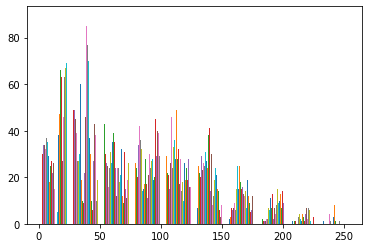

In [35]:
plt.hist(cat_image[:, :, 0])

In [36]:
cat_image[:, :, 0].ravel().shape

(50325,)

In [37]:
cat_image.shape[:2]

(183, 275)

In [38]:
183 * 275

50325

Това е двумерен вектор сторе, което в много случеи е по-правилно като става на въпрос за deeep learning.

In [40]:
cat_image[:, :, 0].reshape(-1, 1).shape

(50325, 1)

Това значи 1 колкона, на колкото дойдат -1 редове.

In [51]:
red_channel_for_histogram = cat_image[:, :, 0].ravel()
green_channel_for_histogram = cat_image[:, :, 1].ravel()
blue_channel_for_histogram = cat_image[:, :, 2].ravel()

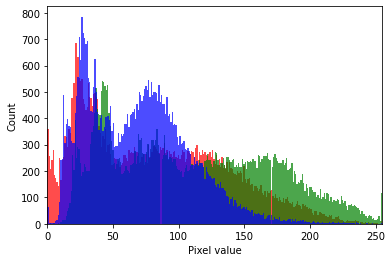

In [55]:
plt.hist(red_channel_for_histogram, bins = 256, color = "red", alpha = 0.7)
plt.hist(green_channel_for_histogram, bins = 256, color = "green", alpha = 0.7)
plt.hist(blue_channel_for_histogram, bins = 256, color = "blue", alpha = 0.7)

plt.xlabel("Pixel value")
plt.ylabel("Count")

plt.xlim(0, 255)

plt.show()

### Сега нека прочетем втора картинка:

In [62]:
imread("cat_taxonomy/domestic-cat/dc (58).jpg")

array([[[236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [241, 242, 244],
        [242, 242, 242],
        [242, 242, 242]],

       [[236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [241, 242, 244],
        [242, 242, 242],
        [242, 242, 242]],

       [[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [241, 242, 244],
        [242, 242, 242],
        [242, 242, 242]],

       ...,

       [[107, 148, 194],
        [107, 148, 194],
        [107, 148, 194],
        ...,
        [237, 233, 234],
        [237, 233, 234],
        [237, 233, 234]],

       [[108, 149, 195],
        [107, 148, 194],
        [107, 148, 194],
        ...,
        [237, 233, 234],
        [237, 233, 234],
        [237, 233, 234]],

       [[108, 149, 195],
        [108, 149, 195],
        [107, 148, 194],
        ...,
        [237, 233, 234],
        [237, 233, 234],
        [237, 233, 234]]

In [63]:
second_cat = imread("cat_taxonomy/domestic-cat/dc (58).jpg")

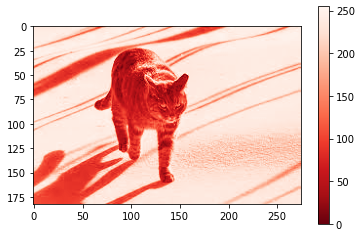

In [65]:
plt.imshow(second_cat[:, :, 0], cmap = "Reds_r")
plt.colorbar()
plt.show()

In [66]:
red_channel_for_histogram = second_cat[:, :, 0].ravel()
green_channel_for_histogram = second_cat[:, :, 1].ravel()
blue_channel_for_histogram = second_cat[:, :, 2].ravel()

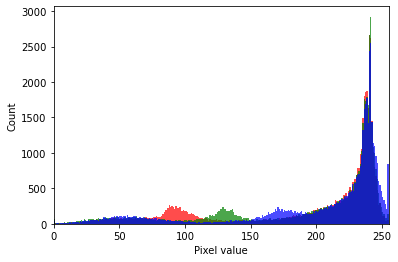

In [68]:
plt.hist(red_channel_for_histogram, bins = 256, color = "red", alpha = 0.7)
plt.hist(green_channel_for_histogram, bins = 256, color = "green", alpha = 0.7)
plt.hist(blue_channel_for_histogram, bins = 256, color = "blue", alpha = 0.7)

plt.xlabel("Pixel value")
plt.ylabel("Count")

plt.xlim(0, 255)

plt.show()

Ако имаме еднакви стойности от всеки цвят се получава сиво. А в зависимост от това колко е стойността получаваме по-тъмно или по-светло сиво.

Когато работим с изображения ние работим със светлина, която виждаме от монитора си. Начинът по който работят цветовете върху монитора и със светлина като цяло е събиране. Когато имаме много от един цвят и много от друг цвят означава, че единият цвят свети много силно, единия пиксел свети много силно - червения и другия до него също свети много силно. Това прави изображението много светло.


Можем да правим и **аритметика** върху изображенията.

In [73]:
cat_image.mean(axis = 0)  # Това означава mean по редове 

array([[ 66.21311475, 100.9726776 ,  60.80327869],
       [ 66.18032787, 101.3715847 ,  60.85245902],
       [ 67.48087432, 102.3442623 ,  62.02185792],
       [ 68.42076503, 103.56830601,  62.84153005],
       [ 68.63934426, 103.42076503,  62.71584699],
       [ 69.45901639, 104.68306011,  63.43169399],
       [ 69.19672131, 104.12568306,  62.86338798],
       [ 69.02185792, 104.37704918,  62.68306011],
       [ 69.60655738, 104.57923497,  62.99453552],
       [ 70.57923497, 105.93442623,  64.        ],
       [ 70.92349727, 106.15846995,  64.37704918],
       [ 72.46994536, 108.10382514,  65.96174863],
       [ 71.92349727, 107.21857923,  65.29508197],
       [ 69.78688525, 105.45355191,  63.16393443],
       [ 69.48087432, 104.84699454,  62.83606557],
       [ 70.75956284, 106.69945355,  64.09289617],
       [ 73.87431694, 109.92349727,  66.87978142],
       [ 71.12568306, 107.75409836,  63.83060109],
       [ 70.7431694 , 107.02185792,  62.94535519],
       [ 71.55191257, 108.21857

In [74]:
cat_image.mean(axis = 0).shape 

(275, 3)

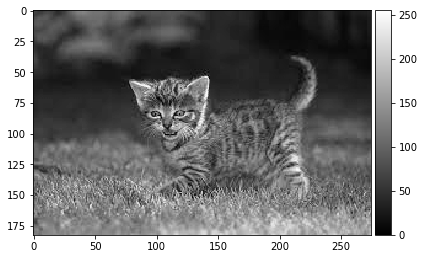

In [76]:
imshow(cat_image.mean(axis = 2), cmap = "gray", vmin = 0, vmax = 255)

Начин на работа, който се нарича gama corection. Едно черно-бяло изображение е 3 пъти по-малко. Има един канал спрямо 3 канала.

In [78]:
red = cat_image[:, :, 0]
green = cat_image[:, :, 1]
blue = cat_image[:, :, 2]

cat_image_gray = 0.299 * red + 0.587 * green + 0.114 * blue

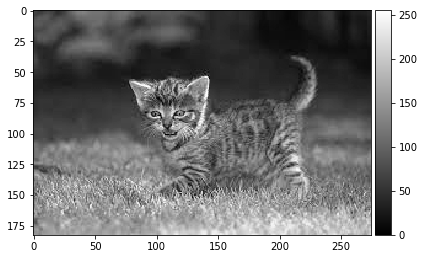

In [79]:
imshow(cat_image_gray, cmap = "gray", vmin = 0, vmax = 255)

In [80]:
cat_image_masked = cat_image.copy()

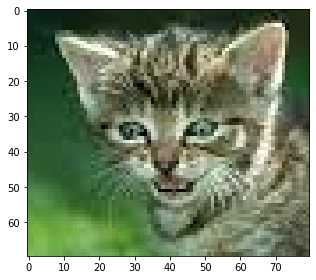

In [85]:
imshow(cat_image_masked[50:120, 70:150])

In [89]:
cat_image_masked[50:120, 70:150] = 0

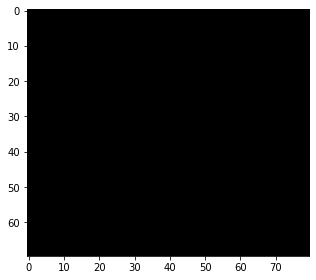

In [90]:
imshow(cat_image_masked[50:120, 70:150])

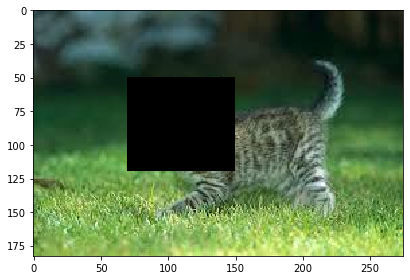

In [91]:
imshow(cat_image_masked)

Това маскиране е много полезно, когато правим Фурие трансформации. Тогава маскираме не изображението, ами спектъра. В аудиото можем да махаме честоти.

Можем да използваме маскирането по много различни начини: за обработка - махаме някоя част, която не ни интересува; за филтриране - правя маска върху Фурие спектъра; с цел интерпретация - за да покрием нещо, което не искаме да бъде използвано дори да бъде полезно това нещо.

#### Нормализация:

In [100]:
cat_image_normalized = cat_image / 255.0

Трябва да видим, че типа данни се променя:

In [94]:
cat_image_normalized.dtype

dtype('float64')

In [96]:
cat_image_normalized

array([[[0.25      , 0.34375   , 0.3515625 ],
        [0.23046875, 0.32421875, 0.33203125],
        [0.19921875, 0.29296875, 0.30078125],
        ...,
        [0.15234375, 0.16015625, 0.109375  ],
        [0.15234375, 0.16015625, 0.10546875],
        [0.15234375, 0.16015625, 0.10546875]],

       [[0.2265625 , 0.3203125 , 0.328125  ],
        [0.21484375, 0.30859375, 0.31640625],
        [0.19140625, 0.28515625, 0.29296875],
        ...,
        [0.15234375, 0.16015625, 0.109375  ],
        [0.15234375, 0.16015625, 0.10546875],
        [0.15234375, 0.16015625, 0.10546875]],

       [[0.1953125 , 0.2890625 , 0.296875  ],
        [0.19140625, 0.28515625, 0.29296875],
        [0.1796875 , 0.2734375 , 0.28125   ],
        ...,
        [0.14453125, 0.15234375, 0.1015625 ],
        [0.14453125, 0.15234375, 0.09765625],
        [0.14453125, 0.15234375, 0.09765625]],

       ...,

       [[0.4609375 , 0.66015625, 0.25      ],
        [0.45703125, 0.65625   , 0.24609375],
        [0.484375  , 0

Някъде може да се наложи да пренареждаме канали:

In [97]:
np.array([blue, green, red])

array([[[ 90,  85,  77, ...,  28,  27,  27],
        [ 84,  81,  75, ...,  28,  27,  27],
        [ 76,  75,  72, ...,  26,  25,  25],
        ...,
        [ 64,  63,  72, ...,  87,  99, 111],
        [ 77,  71,  73, ...,  93, 105, 118],
        [ 85,  78,  77, ...,  97, 109, 121]],

       [[ 88,  83,  75, ...,  41,  41,  41],
        [ 82,  79,  73, ...,  41,  41,  41],
        [ 74,  73,  70, ...,  39,  39,  39],
        ...,
        [169, 168, 172, ..., 202, 216, 227],
        [182, 176, 173, ..., 208, 221, 234],
        [190, 183, 177, ..., 211, 225, 236]],

       [[ 64,  59,  51, ...,  39,  39,  39],
        [ 58,  55,  49, ...,  39,  39,  39],
        [ 50,  49,  46, ...,  37,  37,  37],
        ...,
        [118, 117, 124, ..., 162, 177, 190],
        [131, 125, 125, ..., 169, 184, 199],
        [139, 132, 129, ..., 174, 190, 203]]], dtype=uint8)

Припомняме си какво означава **конволюция (convolution)** - нещо, което е сложно, което е смесено е нещо като композиция на функции.

valid convolution - когато имаме смаляване <br/>
same convolution - когато запазваме размера на изображението

Shape-овете са много важни, когато работим с матрици и не само.

In [107]:
conv_filter = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
])

In [109]:
convolve2d(cat_image[:, :, 0], conv_filter, mode = "same")

array([[119, 166, 149, ..., 112, 117,  78],
       [166, 266, 245, ..., 183, 191, 115],
       [150, 245, 235, ..., 177, 187, 112],
       ...,
       [362, 618, 630, ..., 845, 900, 553],
       [380, 635, 628, ..., 842, 913, 566],
       [264, 388, 379, ..., 511, 558, 387]])

In [110]:
result = convolve2d(cat_image[:, :, 0], conv_filter, mode = "same")

In [111]:
result.min(), result.max()

(0, 1196)

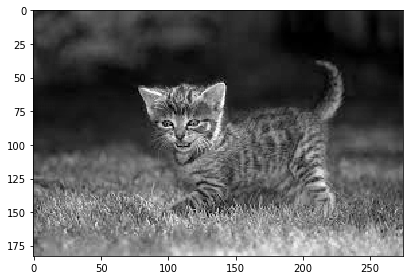

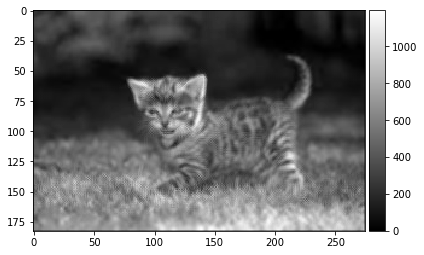

In [113]:
imshow(cat_image[:, :, 0], cmap = "gray")
plt.show()
imshow(result, cmap = "gray")

Първото е оригиналното изображение, а второто е на което е приложен филтъра.

Ако имаме само 1-ци във филтъра той осреднява (размазва) околните пиксели, той се нарича mean филтър.

In [114]:
conv_filter = np.eye(5)

In [116]:
conv_filter

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

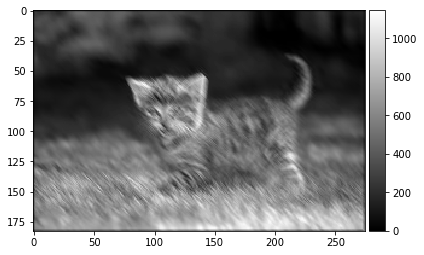

In [118]:
result = convolve2d(cat_image[:, :, 0], conv_filter, mode = "same")

imshow(result, cmap = "gray")
plt.show()